In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
import datetime

In [3]:
path = '../Data/loan.csv'
use_cols = ['date_issued', 'date_last_payment', "disbursed_amount"]

## Parsing Dates using read_csv

In [4]:
df = pd.read_csv(
    path,
    usecols=use_cols,
    parse_dates=['date_issued','date_last_payment']
)

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   disbursed_amount   10000 non-null  float64       
 1   date_issued        10000 non-null  datetime64[ns]
 2   date_last_payment  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 234.5 KB


## Converting to datetime

In [6]:
data = pd.read_csv(path, usecols=use_cols)

data.head()

,disbursed_amount,date_issued,date_last_payment
0,23201.5,2013-06-11,2016-01-14
1,7425.0,2014-05-08,2016-01-25
2,11150.0,2013-10-26,2014-09-26
3,7600.0,2015-08-20,2016-01-26
4,31960.0,2014-07-22,2016-01-11


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   disbursed_amount   10000 non-null  float64
 1   date_issued        10000 non-null  object 
 2   date_last_payment  10000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [8]:
data['date_issued'] = pd.to_datetime(data['date_issued'])
data['date_last_payment'] = pd.to_datetime(data['date_last_payment'])

In [9]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   disbursed_amount   10000 non-null  float64       
 1   date_issued        10000 non-null  datetime64[ns]
 2   date_last_payment  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 234.5 KB


### More options in pd.to_datetime()

In [10]:
data = pd.read_csv(path, usecols=use_cols)

data.head()

,disbursed_amount,date_issued,date_last_payment
0,23201.5,2013-06-11,2016-01-14
1,7425.0,2014-05-08,2016-01-25
2,11150.0,2013-10-26,2014-09-26
3,7600.0,2015-08-20,2016-01-26
4,31960.0,2014-07-22,2016-01-11


In [11]:
data.iloc[0,0] = 'Apple'

C:\Users\vamsh\AppData\Local\Temp\ipykernel_14576\2326322609.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Apple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[0,0] = 'Apple'


In [12]:
data['date_issued'] = pd.to_datetime(data['date_issued'], 
               errors='coerce', 
               format='%Y-%m-%d')

data['date_last_payment'] = pd.to_datetime(data['date_last_payment'], 
               errors='coerce', 
               format='%Y-%m-%d')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   disbursed_amount   10000 non-null  object        
 1   date_issued        10000 non-null  datetime64[ns]
 2   date_last_payment  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 234.5+ KB


## Extracting Dates

In [14]:
df = pd.read_csv(
    path,
    usecols=use_cols,
    parse_dates=['date_issued','date_last_payment']
)

df.head()

,disbursed_amount,date_issued,date_last_payment
0,23201.5,2013-06-11,2016-01-14
1,7425.0,2014-05-08,2016-01-25
2,11150.0,2013-10-26,2014-09-26
3,7600.0,2015-08-20,2016-01-26
4,31960.0,2014-07-22,2016-01-11


###  Extract Year

In [15]:
df['issue_dt_year'] = df['date_issued'].dt.year

df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year
0,23201.5,2013-06-11,2016-01-14,2013
1,7425.0,2014-05-08,2016-01-25,2014
2,11150.0,2013-10-26,2014-09-26,2013
3,7600.0,2015-08-20,2016-01-26,2015
4,31960.0,2014-07-22,2016-01-11,2014


###  Extract Month

In [16]:
df['issue_dt_month'] = df['date_issued'].dt.month

df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month
0,23201.5,2013-06-11,2016-01-14,2013,6
1,7425.0,2014-05-08,2016-01-25,2014,5
2,11150.0,2013-10-26,2014-09-26,2013,10
3,7600.0,2015-08-20,2016-01-26,2015,8
4,31960.0,2014-07-22,2016-01-11,2014,7


### Extract Day


In [17]:
df['issue_dt_day'] = df['date_issued'].dt.day

df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month,issue_dt_day
0,23201.5,2013-06-11,2016-01-14,2013,6,11
1,7425.0,2014-05-08,2016-01-25,2014,5,8
2,11150.0,2013-10-26,2014-09-26,2013,10,26
3,7600.0,2015-08-20,2016-01-26,2015,8,20
4,31960.0,2014-07-22,2016-01-11,2014,7,22


### Extract Quarter

In [18]:
df['issue_dt_quarter'] = df['date_issued'].dt.quarter

df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter
0,23201.5,2013-06-11,2016-01-14,2013,6,11,2
1,7425.0,2014-05-08,2016-01-25,2014,5,8,2
2,11150.0,2013-10-26,2014-09-26,2013,10,26,4
3,7600.0,2015-08-20,2016-01-26,2015,8,20,3
4,31960.0,2014-07-22,2016-01-11,2014,7,22,3


In [19]:
df['issue_dt_quarter'].unique()

array([2, 4, 3, 1])

### Extract Semester

In [20]:
df['issue_dt_semester'] = np.where(df['issue_dt_quarter'].isin([1,2]), 1, 2)

df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester
0,23201.5,2013-06-11,2016-01-14,2013,6,11,2,1
1,7425.0,2014-05-08,2016-01-25,2014,5,8,2,1
2,11150.0,2013-10-26,2014-09-26,2013,10,26,4,2
3,7600.0,2015-08-20,2016-01-26,2015,8,20,3,2
4,31960.0,2014-07-22,2016-01-11,2014,7,22,3,2


In [21]:
df['issue_dt_semester'].unique()

array([1, 2])

### Extract Week of the year

In [22]:
df['issue_dt_week'] = df['date_issued'].dt.isocalendar().week

df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week
0,23201.5,2013-06-11,2016-01-14,2013,6,11,2,1,24
1,7425.0,2014-05-08,2016-01-25,2014,5,8,2,1,19
2,11150.0,2013-10-26,2014-09-26,2013,10,26,4,2,43
3,7600.0,2015-08-20,2016-01-26,2015,8,20,3,2,34
4,31960.0,2014-07-22,2016-01-11,2014,7,22,3,2,30


### Extract Day of week

In [23]:
# day of week - 0 to 6
df['issue_dt_dayofweek'] = df['date_issued'].dt.dayofweek

df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek
0,23201.5,2013-06-11,2016-01-14,2013,6,11,2,1,24,1
1,7425.0,2014-05-08,2016-01-25,2014,5,8,2,1,19,3
2,11150.0,2013-10-26,2014-09-26,2013,10,26,4,2,43,5
3,7600.0,2015-08-20,2016-01-26,2015,8,20,3,2,34,3
4,31960.0,2014-07-22,2016-01-11,2014,7,22,3,2,30,1


### Extract Dayname

In [24]:
df['issue_dt_dayname'] = df['date_issued'].dt.day_name()

df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname
0,23201.5,2013-06-11,2016-01-14,2013,6,11,2,1,24,1,Tuesday
1,7425.0,2014-05-08,2016-01-25,2014,5,8,2,1,19,3,Thursday
2,11150.0,2013-10-26,2014-09-26,2013,10,26,4,2,43,5,Saturday
3,7600.0,2015-08-20,2016-01-26,2015,8,20,3,2,34,3,Thursday
4,31960.0,2014-07-22,2016-01-11,2014,7,22,3,2,30,1,Tuesday


In [25]:
df['issue_dt_dayname'].unique()

array(['Tuesday', 'Thursday', 'Saturday', 'Wednesday', 'Sunday', 'Friday',
       'Monday'], dtype=object)

### Extract Weekend using dayname

In [26]:
df['issue_dt_weekend'] = (np.where(df['issue_dt_dayname']
                                   .isin(['Sunday', 'Saturday']), 1, 0)
                         )

In [27]:
df.head()

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend
0,23201.5,2013-06-11,2016-01-14,2013,6,11,2,1,24,1,Tuesday,0
1,7425.0,2014-05-08,2016-01-25,2014,5,8,2,1,19,3,Thursday,0
2,11150.0,2013-10-26,2014-09-26,2013,10,26,4,2,43,5,Saturday,1
3,7600.0,2015-08-20,2016-01-26,2015,8,20,3,2,34,3,Thursday,0
4,31960.0,2014-07-22,2016-01-11,2014,7,22,3,2,30,1,Tuesday,0


### Extract Weekend using dayofweek

In [28]:
df['issue_dt_weekend2'] = (np.where(df['issue_dt_dayofweek']
                                   .isin([5,6]), 1,0)
                                  )

In [29]:
df['issue_dt_weekend2'].value_counts()

issue_dt_weekend2
0    7176
1    2824
Name: count, dtype: int64

## Timedelta
- represents the amount of time, or difference, between two datetimes
- A `timedelta` is returned when subtracting two datetime values.

In [30]:
df.head(2)

,disbursed_amount,date_issued,date_last_payment,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
0,23201.5,2013-06-11,2016-01-14,2013,6,11,2,1,24,1,Tuesday,0,0
1,7425.0,2014-05-08,2016-01-25,2014,5,8,2,1,19,3,Thursday,0,0


In [31]:
df['date_issued'] - df['date_last_payment']

0      -947 days
1      -627 days
2      -335 days
3      -159 days
4      -538 days
          ...   
9995   -293 days
9996   -312 days
9997   -253 days
9998   -404 days
9999   -362 days
Length: 10000, dtype: timedelta64[ns]

### Extracting date difference

In [32]:
df.insert(3, 'date_diff', (df['date_issued'] - df['date_last_payment']))

### Extracting the days_passed from date difference

In [33]:
df.insert(3, 'days_passed', (df['date_issued'] - df['date_last_payment']).dt.days)

In [34]:
df.head()

,disbursed_amount,date_issued,date_last_payment,days_passed,date_diff,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
0,23201.5,2013-06-11,2016-01-14,-947,-947 days,2013,6,11,2,1,24,1,Tuesday,0,0
1,7425.0,2014-05-08,2016-01-25,-627,-627 days,2014,5,8,2,1,19,3,Thursday,0,0
2,11150.0,2013-10-26,2014-09-26,-335,-335 days,2013,10,26,4,2,43,5,Saturday,1,1
3,7600.0,2015-08-20,2016-01-26,-159,-159 days,2015,8,20,3,2,34,3,Thursday,0,0
4,31960.0,2014-07-22,2016-01-11,-538,-538 days,2014,7,22,3,2,30,1,Tuesday,0,0


### Extracting Weeks Passed

In [35]:
df.insert(5, 'months_passed',
          (df['date_last_payment'] - df['date_issued'])/np.timedelta64(1,'W'))

In [36]:
df.head()

,disbursed_amount,date_issued,date_last_payment,days_passed,date_diff,months_passed,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
0,23201.5,2013-06-11,2016-01-14,-947,-947 days,135.285714,2013,6,11,2,1,24,1,Tuesday,0,0
1,7425.0,2014-05-08,2016-01-25,-627,-627 days,89.571429,2014,5,8,2,1,19,3,Thursday,0,0
2,11150.0,2013-10-26,2014-09-26,-335,-335 days,47.857143,2013,10,26,4,2,43,5,Saturday,1,1
3,7600.0,2015-08-20,2016-01-26,-159,-159 days,22.714286,2015,8,20,3,2,34,3,Thursday,0,0
4,31960.0,2014-07-22,2016-01-11,-538,-538 days,76.857143,2014,7,22,3,2,30,1,Tuesday,0,0


### Extracting time difference to today

In [37]:
(datetime.datetime.now() - df['date_issued']).head()

0   3821 days 11:10:49.204202
1   3490 days 11:10:49.204202
2   3684 days 11:10:49.204202
3   3021 days 11:10:49.204202
4   3415 days 11:10:49.204202
Name: date_issued, dtype: timedelta64[ns]

## Timedelta Arthimetic

- Time delta arthimetic to offset dates by a specified period of time.

In [38]:
df2 = df[['date_issued']].copy()

In [39]:
df2['day_after'] = df2['date_issued'] + pd.to_timedelta(1, unit='D')

In [40]:
df2['2_days_after'] = df2['date_issued'] + pd.to_timedelta(2, unit='D')

In [41]:
df2['week_after'] = df2['date_issued'] + pd.to_timedelta(2, unit='W')

In [42]:
df2.head()

,date_issued,day_after,2_days_after,week_after
0,2013-06-11,2013-06-12,2013-06-13,2013-06-25
1,2014-05-08,2014-05-09,2014-05-10,2014-05-22
2,2013-10-26,2013-10-27,2013-10-28,2013-11-09
3,2015-08-20,2015-08-21,2015-08-22,2015-09-03
4,2014-07-22,2014-07-23,2014-07-24,2014-08-05


## Time Series Indices

- Using datetimes as index allows for intuitive slicing of the dataframe
- It is a requirement in `resampling` 

In [43]:
df.sort_values(by='date_issued', inplace=True)

In [44]:
df.set_index('date_issued', inplace=True)

In [45]:
df.index.min()

Timestamp('2007-07-10 00:00:00')

In [46]:
df.index.max()

Timestamp('2015-12-27 00:00:00')

In [47]:
df.loc['2013-01-01']

,disbursed_amount,date_last_payment,days_passed,date_diff,months_passed,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
date_issued,,,,,,,,,,,,,,,
2013-01-01,19600.0,2016-01-19,-1113,-1113 days,159.000000,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,11880.0,2015-06-14,-894,-894 days,127.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,20000.0,2016-01-03,-1097,-1097 days,156.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,8771.0,2015-09-21,-993,-993 days,141.857143,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,14060.0,2016-01-15,-1109,-1109 days,158.428571,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,7275.0,2016-01-18,-1112,-1112 days,158.857143,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,11880.0,2016-01-24,-1118,-1118 days,159.714286,2013,1,1,1,1,1,1,Tuesday,0,0


In [48]:
df.loc['2013-01-01':'2013-05-01']

,disbursed_amount,date_last_payment,days_passed,date_diff,months_passed,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
date_issued,,,,,,,,,,,,,,,
2013-01-01,19600.00,2016-01-19,-1113,-1113 days,159.000000,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,11880.00,2015-06-14,-894,-894 days,127.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,20000.00,2016-01-03,-1097,-1097 days,156.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,8771.00,2015-09-21,-993,-993 days,141.857143,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,14060.00,2016-01-15,-1109,-1109 days,158.428571,2013,1,1,1,1,1,1,Tuesday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-27,6725.00,2016-01-10,-988,-988 days,141.142857,2013,4,27,2,1,17,5,Saturday,1,1
2013-04-27,15040.00,2016-01-23,-1001,-1001 days,143.000000,2013,4,27,2,1,17,5,Saturday,1,1
2013-05-01,3699.50,2013-10-15,-167,-167 days,23.857143,2013,5,1,2,1,18,2,Wednesday,0,0


### Partial String Indexing

In [49]:
df.loc['2013-01']

,disbursed_amount,date_last_payment,days_passed,date_diff,months_passed,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
date_issued,,,,,,,,,,,,,,,
2013-01-01,19600.00,2016-01-19,-1113,-1113 days,159.000000,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,11880.00,2015-06-14,-894,-894 days,127.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,20000.00,2016-01-03,-1097,-1097 days,156.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,8771.00,2015-09-21,-993,-993 days,141.857143,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,14060.00,2016-01-15,-1109,-1109 days,158.428571,2013,1,1,1,1,1,1,Tuesday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-26,12840.00,2014-12-22,-695,-695 days,99.285714,2013,1,26,1,1,4,5,Saturday,1,1
2013-01-26,10670.00,2015-01-22,-726,-726 days,103.714286,2013,1,26,1,1,4,5,Saturday,1,1
2013-01-27,18960.00,2015-12-05,-1042,-1042 days,148.857143,2013,1,27,1,1,4,6,Sunday,1,1


In [50]:
df.loc['2013']

,disbursed_amount,date_last_payment,days_passed,date_diff,months_passed,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
date_issued,,,,,,,,,,,,,,,
2013-01-01,19600.0,2016-01-19,-1113,-1113 days,159.000000,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,11880.0,2015-06-14,-894,-894 days,127.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,20000.0,2016-01-03,-1097,-1097 days,156.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,8771.0,2015-09-21,-993,-993 days,141.857143,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,14060.0,2016-01-15,-1109,-1109 days,158.428571,2013,1,1,1,1,1,1,Tuesday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,18360.0,2014-11-25,-333,-333 days,47.571429,2013,12,27,4,2,52,4,Friday,0,0
2013-12-27,21000.0,2015-09-17,-629,-629 days,89.857143,2013,12,27,4,2,52,4,Friday,0,0
2013-12-27,16296.0,2016-01-27,-761,-761 days,108.714286,2013,12,27,4,2,52,4,Friday,0,0


In [51]:
df.loc['2013-01':'2014-01']

,disbursed_amount,date_last_payment,days_passed,date_diff,months_passed,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
date_issued,,,,,,,,,,,,,,,
2013-01-01,19600.0,2016-01-19,-1113,-1113 days,159.000000,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,11880.0,2015-06-14,-894,-894 days,127.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,20000.0,2016-01-03,-1097,-1097 days,156.714286,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,8771.0,2015-09-21,-993,-993 days,141.857143,2013,1,1,1,1,1,1,Tuesday,0,0
2013-01-01,14060.0,2016-01-15,-1109,-1109 days,158.428571,2013,1,1,1,1,1,1,Tuesday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-27,5915.0,2015-12-03,-675,-675 days,96.428571,2014,1,27,1,1,5,0,Monday,0,0
2014-01-27,16767.0,2015-02-25,-394,-394 days,56.285714,2014,1,27,1,1,5,0,Monday,0,0
2014-01-27,17820.0,2016-01-09,-712,-712 days,101.714286,2014,1,27,1,1,5,0,Monday,0,0


## DateTimeIndex Attribute Accessors

In [52]:
df.index

DatetimeIndex(['2007-07-10', '2007-08-14', '2007-09-16', '2007-09-21',
               '2007-10-02', '2007-12-11', '2008-01-03', '2008-01-09',
               '2008-01-16', '2008-01-24',
               ...
               '2015-12-27', '2015-12-27', '2015-12-27', '2015-12-27',
               '2015-12-27', '2015-12-27', '2015-12-27', '2015-12-27',
               '2015-12-27', '2015-12-27'],
              dtype='datetime64[ns]', name='date_issued', length=10000, freq=None)

In [53]:
df.index.quarter

Index([3, 3, 3, 3, 4, 4, 1, 1, 1, 1,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='date_issued', length=10000)

In [54]:
df.index.month

Index([ 7,  8,  9,  9, 10, 12,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='date_issued', length=10000)

In [55]:
df.index.month_name()

Index(['July', 'August', 'September', 'September', 'October', 'December',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='date_issued', length=10000)

In [56]:
df.index.day_name()

Index(['Tuesday', 'Tuesday', 'Sunday', 'Friday', 'Tuesday', 'Tuesday',
       'Thursday', 'Wednesday', 'Wednesday', 'Thursday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='date_issued', length=10000)

### Boolean masks with datetimeindex attributes

In [57]:
df.index.year.unique()

Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='int32', name='date_issued')

In [58]:
# leap year and feb's
mask = (df.index.year %4 == 0) & (df.index.month == 2)

df.loc[mask].head()

,disbursed_amount,date_last_payment,days_passed,date_diff,months_passed,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
date_issued,,,,,,,,,,,,,,,
2008-02-04,1504.0,2011-02-04,-1096,-1096 days,156.571429,2008,2,4,1,1,6,0,Monday,0,0
2008-02-04,5700.0,2010-11-06,-1006,-1006 days,143.714286,2008,2,4,1,1,6,0,Monday,0,0
2008-02-06,21840.0,2008-06-23,-138,-138 days,19.714286,2008,2,6,1,1,6,2,Wednesday,0,0
2008-02-10,2790.0,2008-07-20,-161,-161 days,23.000000,2008,2,10,1,1,6,6,Sunday,1,1
2008-02-19,14100.0,2011-02-05,-1082,-1082 days,154.571429,2008,2,19,1,1,8,1,Tuesday,0,0


In [59]:
# leap year and feb's
mask = (df.index.is_leap_year) & (df.index.month == 2)

df.loc[mask].head()

,disbursed_amount,date_last_payment,days_passed,date_diff,months_passed,issue_dt_year,issue_dt_month,issue_dt_day,issue_dt_quarter,issue_dt_semester,issue_dt_week,issue_dt_dayofweek,issue_dt_dayname,issue_dt_weekend,issue_dt_weekend2
date_issued,,,,,,,,,,,,,,,
2008-02-04,1504.0,2011-02-04,-1096,-1096 days,156.571429,2008,2,4,1,1,6,0,Monday,0,0
2008-02-04,5700.0,2010-11-06,-1006,-1006 days,143.714286,2008,2,4,1,1,6,0,Monday,0,0
2008-02-06,21840.0,2008-06-23,-138,-138 days,19.714286,2008,2,6,1,1,6,2,Wednesday,0,0
2008-02-10,2790.0,2008-07-20,-161,-161 days,23.000000,2008,2,10,1,1,6,6,Sunday,1,1
2008-02-19,14100.0,2011-02-05,-1082,-1082 days,154.571429,2008,2,19,1,1,8,1,Tuesday,0,0


## Creating a Customized Date Ranges with pd.date_range()

In [60]:
pd.date_range(start='10 may 2023', end='20 june 2023')

DatetimeIndex(['2023-05-10', '2023-05-11', '2023-05-12', '2023-05-13',
               '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17',
               '2023-05-18', '2023-05-19', '2023-05-20', '2023-05-21',
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29',
               '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
               '2023-06-03', '2023-06-04', '2023-06-05', '2023-06-06',
               '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10',
               '2023-06-11', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16', '2023-06-17', '2023-06-18',
               '2023-06-19', '2023-06-20'],
              dtype='datetime64[ns]', freq='D')

In [61]:
pd.DataFrame(
    {"Dates":pd.date_range(start='10 may 2023', end='20 june 2023')}
).head()

,Dates
0,2023-05-10
1,2023-05-11
2,2023-05-12
3,2023-05-13
4,2023-05-14


In [62]:
pd.DataFrame(
    {"Dates":pd.date_range(start='2023-05-10', end='2023-06-20')}
).head()

,Dates
0,2023-05-10
1,2023-05-11
2,2023-05-12
3,2023-05-13
4,2023-05-14


### days

In [63]:
# the default frequency is days
pd.date_range(start='5 October 2023', periods=10)

DatetimeIndex(['2023-10-05', '2023-10-06', '2023-10-07', '2023-10-08',
               '2023-10-09', '2023-10-10', '2023-10-11', '2023-10-12',
               '2023-10-13', '2023-10-14'],
              dtype='datetime64[ns]', freq='D')

### Week

In [64]:
pd.date_range(start='5 October 2023', periods=10, freq='W')

DatetimeIndex(['2023-10-08', '2023-10-15', '2023-10-22', '2023-10-29',
               '2023-11-05', '2023-11-12', '2023-11-19', '2023-11-26',
               '2023-12-03', '2023-12-10'],
              dtype='datetime64[ns]', freq='W-SUN')

### 2 Weeks

In [65]:
pd.date_range(start='5 October 2023', periods=10, freq='2W')

DatetimeIndex(['2023-10-08', '2023-10-22', '2023-11-05', '2023-11-19',
               '2023-12-03', '2023-12-17', '2023-12-31', '2024-01-14',
               '2024-01-28', '2024-02-11'],
              dtype='datetime64[ns]', freq='2W-SUN')

### Month

In [66]:
pd.date_range(start='5 October 2023', periods=10, freq='M')

DatetimeIndex(['2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31'],
              dtype='datetime64[ns]', freq='M')

### 3 Months

In [67]:
pd.date_range(start='5 October 2023', periods=10, freq='3M')

DatetimeIndex(['2023-10-31', '2024-01-31', '2024-04-30', '2024-07-31',
               '2024-10-31', '2025-01-31', '2025-04-30', '2025-07-31',
               '2025-10-31', '2026-01-31'],
              dtype='datetime64[ns]', freq='3M')

### Quarter

In [68]:
pd.date_range(start='5 October 2023', periods=10, freq='Q')

DatetimeIndex(['2023-12-31', '2024-03-31', '2024-06-30', '2024-09-30',
               '2024-12-31', '2025-03-31', '2025-06-30', '2025-09-30',
               '2025-12-31', '2026-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

**Note**: 3 Months is not equal to quarter, compare the dates.

### Business Day

In [69]:
pd.date_range(start='5 October 2023', periods=10, freq='B')

DatetimeIndex(['2023-10-05', '2023-10-06', '2023-10-09', '2023-10-10',
               '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
               '2023-10-17', '2023-10-18'],
              dtype='datetime64[ns]', freq='B')

### Hourly

In [70]:
pd.date_range(start='5 October 2023',periods=10, freq="H")

DatetimeIndex(['2023-10-05 00:00:00', '2023-10-05 01:00:00',
               '2023-10-05 02:00:00', '2023-10-05 03:00:00',
               '2023-10-05 04:00:00', '2023-10-05 05:00:00',
               '2023-10-05 06:00:00', '2023-10-05 07:00:00',
               '2023-10-05 08:00:00', '2023-10-05 09:00:00'],
              dtype='datetime64[ns]', freq='H')

### Week with specific Week day 
- Monday every week or Tuesday every week

In [71]:
pd.date_range(start='5 October 2023',periods=10, freq="W-Mon")
# W-Mon, W-Tue, W-Wed, W-Thu, W-Fri, W-Sat, W-Sun

DatetimeIndex(['2023-10-09', '2023-10-16', '2023-10-23', '2023-10-30',
               '2023-11-06', '2023-11-13', '2023-11-20', '2023-11-27',
               '2023-12-04', '2023-12-11'],
              dtype='datetime64[ns]', freq='W-MON')

### Month Start

In [72]:
pd.date_range(start='5 October 2023',periods=10, freq="MS")

DatetimeIndex(['2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01'],
              dtype='datetime64[ns]', freq='MS')

### Offseting a month with a specific date

In [73]:
pd.date_range(start='5 October 2023',periods=10, 
              freq=pd.DateOffset(months=1))

DatetimeIndex(['2023-10-05', '2023-11-05', '2023-12-05', '2024-01-05',
               '2024-02-05', '2024-03-05', '2024-04-05', '2024-05-05',
               '2024-06-05', '2024-07-05'],
              dtype='datetime64[ns]', freq='<DateOffset: months=1>')

### Quarter Start

In [74]:
pd.date_range(start='5 October 2023',periods=10, 
              freq="QS")

DatetimeIndex(['2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01',
               '2025-01-01', '2025-04-01', '2025-07-01', '2025-10-01',
               '2026-01-01', '2026-04-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

### Annual

In [75]:
pd.date_range(start='5 October 2023', periods=10, freq='A')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31', '2030-12-31',
               '2031-12-31', '2032-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

### Annual Start

In [76]:
pd.date_range(start='5 October 2023', periods=10, freq='AS')

DatetimeIndex(['2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01',
               '2028-01-01', '2029-01-01', '2030-01-01', '2031-01-01',
               '2032-01-01', '2033-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

### Annual Start with specific month

In [77]:
pd.date_range(start='5 October 2023', periods=10, freq='A-Jul')

DatetimeIndex(['2024-07-31', '2025-07-31', '2026-07-31', '2027-07-31',
               '2028-07-31', '2029-07-31', '2030-07-31', '2031-07-31',
               '2032-07-31', '2033-07-31'],
              dtype='datetime64[ns]', freq='A-JUL')

### Annual with a specific date

In [78]:
pd.date_range(start='5 October 2023', 
              periods=10, 
              freq=pd.DateOffset(years=1))

DatetimeIndex(['2023-10-05', '2024-10-05', '2025-10-05', '2026-10-05',
               '2027-10-05', '2028-10-05', '2029-10-05', '2030-10-05',
               '2031-10-05', '2032-10-05'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

### Date and Time

In [79]:
pd.date_range(start='5 October 2023', periods=10, freq='3D8H')

DatetimeIndex(['2023-10-05 00:00:00', '2023-10-08 08:00:00',
               '2023-10-11 16:00:00', '2023-10-15 00:00:00',
               '2023-10-18 08:00:00', '2023-10-21 16:00:00',
               '2023-10-25 00:00:00', '2023-10-28 08:00:00',
               '2023-10-31 16:00:00', '2023-11-04 00:00:00'],
              dtype='datetime64[ns]', freq='80H')

### Creating a DataFrame using pd.date_range

In [80]:
pd.DataFrame(
    index = pd.date_range(start='5 October 2023', periods=10, freq='Q'),
    data = np.random.randint(100, size=(10,4)),
    columns=list('abcd')
)

,a,b,c,d
2023-12-31,1,53,20,92
2024-03-31,71,11,77,78
2024-06-30,54,79,8,19
2024-09-30,24,80,28,54
2024-12-31,11,32,59,5
2025-03-31,63,63,78,61
2025-06-30,16,95,68,89
2025-09-30,50,11,37,49
2025-12-31,86,10,37,43
2026-03-31,78,83,57,1


## Shifting Series

### Shift

- You can **shift a series** by a specified number of rows using the `.shift()` method.
- This is helpful when working with time series to compare values against previous periods.

In [81]:
df_agg = (df.groupby(['date_issued'])
            .agg({'disbursed_amount':'sum'})
            .round().iloc[1:10])

In [82]:
df_agg.assign(
    yesterday = df_agg['disbursed_amount'].shift(),
    diff = df_agg['disbursed_amount'] - df_agg['disbursed_amount'].shift(),
    ratio = (df_agg['disbursed_amount'] - df_agg['disbursed_amount'].shift())/df_agg['disbursed_amount']
)

,disbursed_amount,yesterday,diff,ratio
date_issued,,,,
2007-08-14,18600.0,NaN,NaN,NaN
2007-09-16,9900.0,18600.0,-8700.0,-0.878788
2007-09-21,9532.0,9900.0,-368.0,-0.038607
2007-10-02,14256.0,9532.0,4724.0,0.331369
2007-12-11,2796.0,14256.0,-11460.0,-4.098712
2008-01-03,7440.0,2796.0,4644.0,0.624194
2008-01-09,3920.0,7440.0,-3520.0,-0.897959
2008-01-16,7766.0,3920.0,3846.0,0.495236
2008-01-24,6370.0,7766.0,-1396.0,-0.219152


### Diff

- The **.diff()** method calculates a difference b/w the values in a Series and those same values shifted a specified number of periods.
- This is useful in measuring absolute changes over time.

- `dates.diff()` = dates - dates.shift(1)
    - Both methods calculate the difference between the current row and the previous one.

- `dates.diff(2)`
    - .diff() calculates the difference from the previous row by default, but you can specify the number of rows as well.

In [83]:
df_agg.assign(
    change = (df_agg['disbursed_amount'].diff())/df_agg['disbursed_amount'].shift(1)
)

,disbursed_amount,change
date_issued,,
2007-08-14,18600.0,NaN
2007-09-16,9900.0,-0.467742
2007-09-21,9532.0,-0.037172
2007-10-02,14256.0,0.495594
2007-12-11,2796.0,-0.803872
2008-01-03,7440.0,1.660944
2008-01-09,3920.0,-0.473118
2008-01-16,7766.0,0.981122
2008-01-24,6370.0,-0.179758


## Resample - Downsampling

In [84]:
data = pd.read_csv(
    path, 
    usecols=['date_issued', 'disbursed_amount'],
    parse_dates=['date_issued']
)

In [85]:
data.head()

,disbursed_amount,date_issued
0,23201.5,2013-06-11
1,7425.0,2014-05-08
2,11150.0,2013-10-26
3,7600.0,2015-08-20
4,31960.0,2014-07-22


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   disbursed_amount  10000 non-null  float64       
 1   date_issued       10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.4 KB


In [87]:
data.sort_values(by='date_issued', inplace=True)

In [88]:
data.set_index('date_issued', inplace=True)

In [89]:
data.head()

,disbursed_amount
date_issued,
2007-07-10,1820.00
2007-08-14,18600.00
2007-09-16,9900.00
2007-09-21,9532.25
2007-10-02,14256.00


### first

In [90]:
data.resample('M').first().head()
# returns the first value from the aggregated values

,disbursed_amount
date_issued,
2007-07-31,1820.0
2007-08-31,18600.0
2007-09-30,9900.0
2007-10-31,14256.0
2007-11-30,NaN


In [91]:
data.head()

,disbursed_amount
date_issued,
2007-07-10,1820.00
2007-08-14,18600.00
2007-09-16,9900.00
2007-09-21,9532.25
2007-10-02,14256.00


In [92]:
data.loc['2007-11']

,disbursed_amount
date_issued,


In [93]:
data.loc['2007-09']

,disbursed_amount
date_issued,
2007-09-16,9900.00
2007-09-21,9532.25


### last

In [94]:
data.resample('M').last()

,disbursed_amount
date_issued,
2007-07-31,1820.00
2007-08-31,18600.00
2007-09-30,9532.25
2007-10-31,14256.00
2007-11-30,NaN
...,...
2015-08-31,5520.00
2015-09-30,21840.00
2015-10-31,9900.00


### mean

In [95]:
data.resample('M').mean().round()

,disbursed_amount
date_issued,
2007-07-31,1820.0
2007-08-31,18600.0
2007-09-30,9716.0
2007-10-31,14256.0
2007-11-30,NaN
...,...
2015-08-31,15003.0
2015-09-30,15571.0
2015-10-31,14388.0


### median

In [96]:
data.resample('M').median()

,disbursed_amount
date_issued,
2007-07-31,1820.000
2007-08-31,18600.000
2007-09-30,9716.125
2007-10-31,14256.000
2007-11-30,NaN
...,...
2015-08-31,13830.000
2015-09-30,14400.000
2015-10-31,12934.750


### weekly

In [97]:
data.resample('W').mean().head()

,disbursed_amount
date_issued,
2007-07-15,1820.0
2007-07-22,NaN
2007-07-29,NaN
2007-08-05,NaN
2007-08-12,NaN


### monthly

In [98]:
data.resample('M').mean().head()

,disbursed_amount
date_issued,
2007-07-31,1820.000
2007-08-31,18600.000
2007-09-30,9716.125
2007-10-31,14256.000
2007-11-30,NaN


### Month Start

In [99]:
data.resample('MS').mean().head()

,disbursed_amount
date_issued,
2007-07-01,1820.000
2007-08-01,18600.000
2007-09-01,9716.125
2007-10-01,14256.000
2007-11-01,NaN


### Quarter

In [100]:
data.resample('Q').mean().head()

,disbursed_amount
date_issued,
2007-09-30,9963.062500
2007-12-31,8526.250000
2008-03-31,8926.618421
2008-06-30,6048.500000
2008-09-30,3455.000000


### Year

In [101]:
data.resample('Y').mean().head()

,disbursed_amount
date_issued,
2007-12-31,9484.125000
2008-12-31,7287.850000
2009-12-31,9876.783088
2010-12-31,9711.495192
2011-12-31,11198.057971


### Year Start

In [102]:
data.resample('YS').mean().head()

,disbursed_amount
date_issued,
2007-01-01,9484.125000
2008-01-01,7287.850000
2009-01-01,9876.783088
2010-01-01,9711.495192
2011-01-01,11198.057971


## Resample &  kind='period'

- Look at how dates are displayed here when kind='period'

### Monthly

In [103]:
data.resample("M", kind='period').mean().head()

,disbursed_amount
date_issued,
2007-07,1820.000
2007-08,18600.000
2007-09,9716.125
2007-10,14256.000
2007-11,NaN


### Quarterly

In [104]:
data.resample("Q", kind='period').mean().head()

,disbursed_amount
date_issued,
2007Q3,9963.062500
2007Q4,8526.250000
2008Q1,8926.618421
2008Q2,6048.500000
2008Q3,3455.000000


### Annually

In [105]:
data.resample("Y", kind='period').mean().head()

,disbursed_amount
date_issued,
2007,9484.125000
2008,7287.850000
2009,9876.783088
2010,9711.495192
2011,11198.057971


## Resample

- Upsampling & Interpolation

### Upsampling

In [106]:
data.resample('12H').mean()

,disbursed_amount
date_issued,
2007-07-10 00:00:00,1820.000000
2007-07-10 12:00:00,NaN
2007-07-11 00:00:00,NaN
2007-07-11 12:00:00,NaN
2007-07-12 00:00:00,NaN
...,...
2015-12-25 00:00:00,13717.183333
2015-12-25 12:00:00,NaN
2015-12-26 00:00:00,15378.478261


### Upsampling & Interpolating

In [107]:
data.resample('12H').mean().interpolate(method='linear').round()

,disbursed_amount
date_issued,
2007-07-10 00:00:00,1820.0
2007-07-10 12:00:00,2060.0
2007-07-11 00:00:00,2299.0
2007-07-11 12:00:00,2539.0
2007-07-12 00:00:00,2779.0
...,...
2015-12-25 00:00:00,13717.0
2015-12-25 12:00:00,14548.0
2015-12-26 00:00:00,15378.0


## Missing Time Series Data

- fillna()
- bfill
- ffill
- interpolate

**Forward-filling** and **back-filling** data replaces missing values with either the value from the previous available date, or the next available date

**Interpolating** data replaces missing values with a linear approximation based on the values from the previous and next available dates.

<Axes: xlabel='date_issued'>

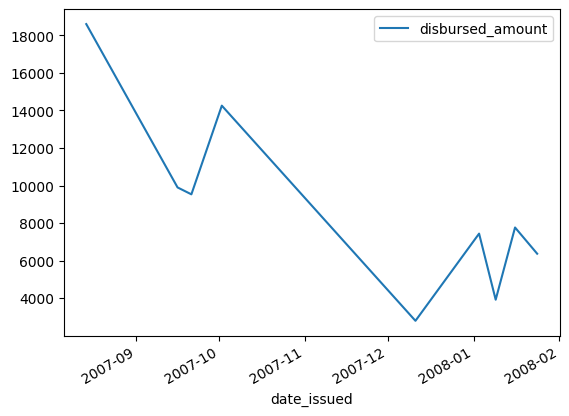

In [108]:
df_agg.plot()

In [109]:
df_agg.iloc[1] = np.NaN
df_agg.iloc[4:6] = np.NaN

<Axes: xlabel='date_issued'>

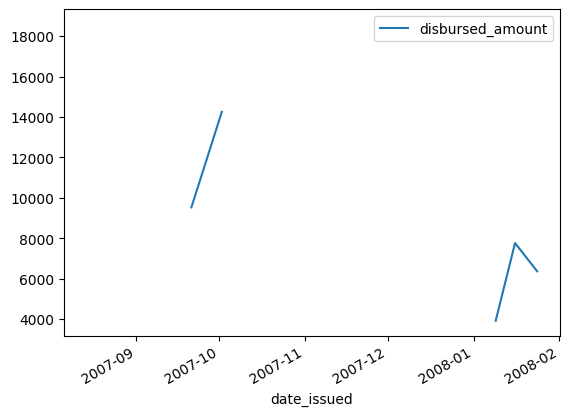

In [110]:
df_agg.plot()

In [111]:
df_agg

,disbursed_amount
date_issued,
2007-08-14,18600.0
2007-09-16,NaN
2007-09-21,9532.0
2007-10-02,14256.0
2007-12-11,NaN
2008-01-03,NaN
2008-01-09,3920.0
2008-01-16,7766.0
2008-01-24,6370.0


### fillna()

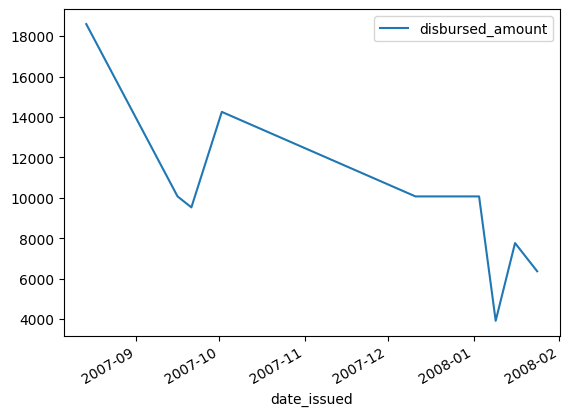

In [112]:
df_agg.fillna(df_agg['disbursed_amount'].mean()).plot();

### ffill() - forward fill

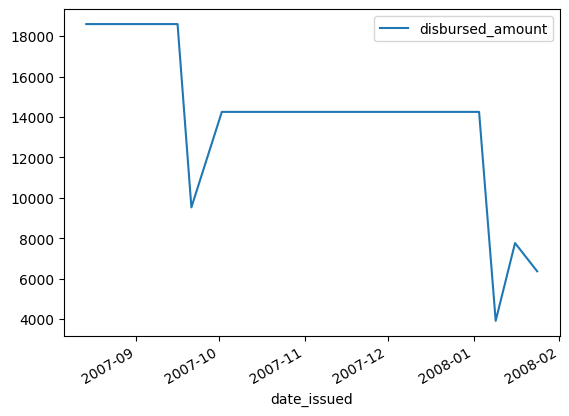

In [113]:
df_agg.ffill().plot();

### bfill() - backward fill

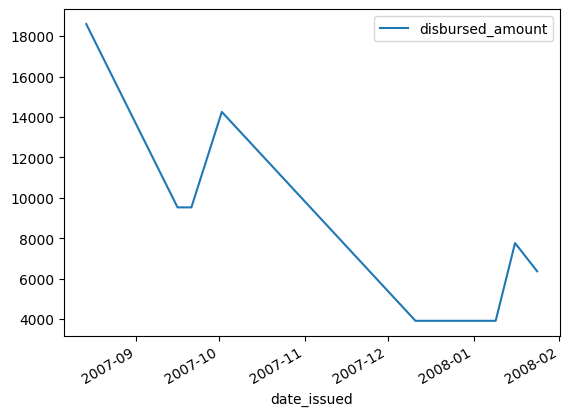

In [114]:
df_agg.bfill().plot();

### interpolate

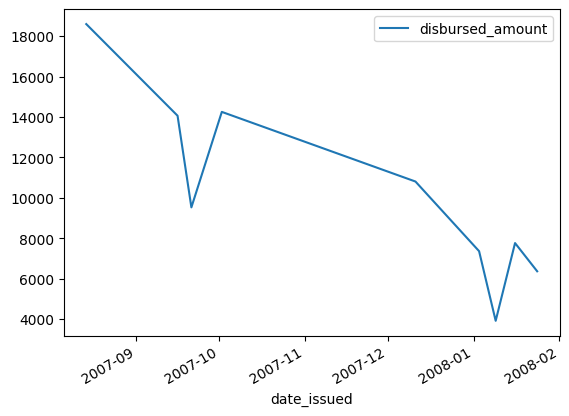

In [115]:
df_agg.interpolate().plot();

In [116]:
df_agg.interpolate()

,disbursed_amount
date_issued,
2007-08-14,18600.000000
2007-09-16,14066.000000
2007-09-21,9532.000000
2007-10-02,14256.000000
2007-12-11,10810.666667
2008-01-03,7365.333333
2008-01-09,3920.000000
2008-01-16,7766.000000
2008-01-24,6370.000000


## Rolling Aggregations

- Rolling Aggregations let you perform calculations on shifting periods of time.

- This can be used to calculate things like moving averages, which are helpful in reducing noies when plotting trends.

In [117]:
daily = data.resample("D").sum().round()

In [118]:
daily.rolling(2).mean()

,disbursed_amount
date_issued,
2007-07-10,NaN
2007-07-11,910.0
2007-07-12,0.0
2007-07-13,0.0
2007-07-14,0.0
...,...
2015-12-23,219693.5
2015-12-24,198703.0
2015-12-25,200828.0


<Axes: xlabel='date_issued'>

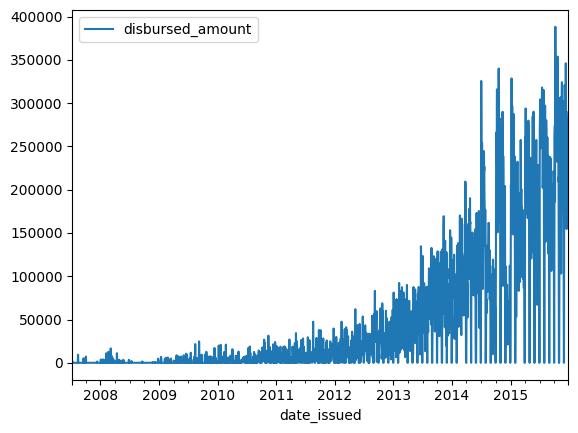

In [119]:
daily.rolling(2).mean().plot()

<Axes: xlabel='date_issued'>

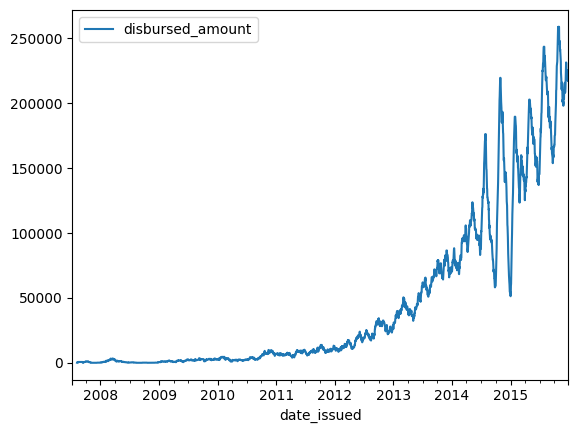

In [120]:
daily.rolling(30).mean().plot()

<Axes: xlabel='date_issued'>

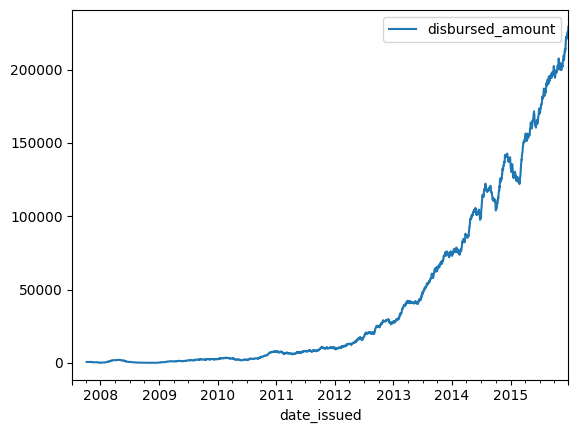

In [121]:
daily.rolling(90).mean().plot()

## Extracting Time Components

Extract different ways of representing time from a timestamp.

In [133]:
date = pd.Series(pd.date_range('2024-01-05 11:35:00', periods=7, freq='H'))
df = pd.DataFrame(dict(date=date))
df

,date
0,2024-01-05 11:35:00
1,2024-01-05 12:35:00
2,2024-01-05 13:35:00
3,2024-01-05 14:35:00
4,2024-01-05 15:35:00
5,2024-01-05 16:35:00
6,2024-01-05 17:35:00


### Extract time from datetime

In [139]:
df['time'] = df['date'].dt.time

### Extract hour

In [135]:
df['hour'] = df['date'].dt.hour

### Extract minute

In [136]:
df['minute'] = df['date'].dt.minute

### Extract Second

In [137]:
df['second'] = df['date'].dt.second

In [140]:
df.sample()

,date,hour,minute,second,time
4,2024-01-05 15:35:00,15,35,0,15:35:00


### Extract hr, min, sec at the same time

In [143]:
df[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df['time']])
df

,date,hour,minute,second,time,h,m,s
0,2024-01-05 11:35:00,11,35,0,11:35:00,11,35,0
1,2024-01-05 12:35:00,12,35,0,12:35:00,12,35,0
2,2024-01-05 13:35:00,13,35,0,13:35:00,13,35,0
3,2024-01-05 14:35:00,14,35,0,14:35:00,14,35,0
4,2024-01-05 15:35:00,15,35,0,15:35:00,15,35,0
5,2024-01-05 16:35:00,16,35,0,16:35:00,16,35,0
6,2024-01-05 17:35:00,17,35,0,17:35:00,17,35,0


## Calculate time difference

In [145]:
date1 = pd.Series(pd.date_range('2012-1-1 12:00:00', periods=7, freq='M'))
date2 = pd.Series(pd.date_range('2013-3-11 21:45:00', periods=7, freq='W'))

data = pd.DataFrame(dict(start_date=date1, end_date=date2))
data.head()

,start_date,end_date
0,2012-01-31 12:00:00,2013-03-17 21:45:00
1,2012-02-29 12:00:00,2013-03-24 21:45:00
2,2012-03-31 12:00:00,2013-03-31 21:45:00
3,2012-04-30 12:00:00,2013-04-07 21:45:00
4,2012-05-31 12:00:00,2013-04-14 21:45:00


### Calculate time elapsed in seconds

In [147]:
data['diff_seconds'] = data['end_date'] - data['start_date']
data['diff_seconds'] = data['diff_seconds']/np.timedelta64(1,'s')
data

,start_date,end_date,diff_seconds
0,2012-01-31 12:00:00,2013-03-17 21:45:00,35545500.0
1,2012-02-29 12:00:00,2013-03-24 21:45:00,33644700.0
2,2012-03-31 12:00:00,2013-03-31 21:45:00,31571100.0
3,2012-04-30 12:00:00,2013-04-07 21:45:00,29583900.0
4,2012-05-31 12:00:00,2013-04-14 21:45:00,27510300.0
5,2012-06-30 12:00:00,2013-04-21 21:45:00,25523100.0
6,2012-07-31 12:00:00,2013-04-28 21:45:00,23449500.0


### Calculate time elapsed in minutes

In [148]:
data['diff_minutes'] = data['end_date'] - data['start_date']
data['diff_minutes'] = data['diff_minutes']/np.timedelta64(1,'m')
data

,start_date,end_date,diff_seconds,diff_minutes
0,2012-01-31 12:00:00,2013-03-17 21:45:00,35545500.0,592425.0
1,2012-02-29 12:00:00,2013-03-24 21:45:00,33644700.0,560745.0
2,2012-03-31 12:00:00,2013-03-31 21:45:00,31571100.0,526185.0
3,2012-04-30 12:00:00,2013-04-07 21:45:00,29583900.0,493065.0
4,2012-05-31 12:00:00,2013-04-14 21:45:00,27510300.0,458505.0
5,2012-06-30 12:00:00,2013-04-21 21:45:00,25523100.0,425385.0
6,2012-07-31 12:00:00,2013-04-28 21:45:00,23449500.0,390825.0


### Calculate time elapsed in hours

In [152]:
data['diff_hours'] = data['end_date'] - data['start_date']
data['diff_hours']=data['diff_hours']/np.timedelta64(1,'h')
 
data

,start_date,end_date,diff_seconds,diff_minutes,diff_hours
0,2012-01-31 12:00:00,2013-03-17 21:45:00,35545500.0,592425.0,9873.75
1,2012-02-29 12:00:00,2013-03-24 21:45:00,33644700.0,560745.0,9345.75
2,2012-03-31 12:00:00,2013-03-31 21:45:00,31571100.0,526185.0,8769.75
3,2012-04-30 12:00:00,2013-04-07 21:45:00,29583900.0,493065.0,8217.75
4,2012-05-31 12:00:00,2013-04-14 21:45:00,27510300.0,458505.0,7641.75
5,2012-06-30 12:00:00,2013-04-21 21:45:00,25523100.0,425385.0,7089.75
6,2012-07-31 12:00:00,2013-04-28 21:45:00,23449500.0,390825.0,6513.75


## Working with different timezones

In the next few cells, we will see how to work with timestamps that are in different time zones.

In [160]:
from datetime import datetime

In [166]:
df = pd.DataFrame()
df['time'] = pd.concat([
pd.Series(pd.date_range(
    start= datetime.today(), freq='H', periods=3,
    tz='Europe/Berlin'
)),

pd.Series(
    pd.date_range(
    start= datetime.today(), freq='H', periods=3,
    tz='US/Central'
)),

pd.Series(
    pd.date_range(
    start=datetime.today(),
    freq='H',
    periods=3,
    tz='Asia/Kolkata'
))], axis=0)

In [167]:
df

,time
0,2023-11-27 11:32:33.257668+01:00
1,2023-11-27 12:32:33.257668+01:00
2,2023-11-27 13:32:33.257668+01:00
0,2023-11-27 11:32:33.257668-06:00
1,2023-11-27 12:32:33.257668-06:00
2,2023-11-27 13:32:33.257668-06:00
0,2023-11-27 11:32:33.257668+05:30
1,2023-11-27 12:32:33.257668+05:30
2,2023-11-27 13:32:33.257668+05:30


we can see the different timezones indicated by +2 and -5, w.r.t the meridian

In [168]:
df['time_utc'] = pd.to_datetime(df['time'], utc=True)
df

,time,time_utc
0,2023-11-27 11:32:33.257668+01:00,2023-11-27 10:32:33.257668+00:00
1,2023-11-27 12:32:33.257668+01:00,2023-11-27 11:32:33.257668+00:00
2,2023-11-27 13:32:33.257668+01:00,2023-11-27 12:32:33.257668+00:00
0,2023-11-27 11:32:33.257668-06:00,2023-11-27 17:32:33.257668+00:00
1,2023-11-27 12:32:33.257668-06:00,2023-11-27 18:32:33.257668+00:00
2,2023-11-27 13:32:33.257668-06:00,2023-11-27 19:32:33.257668+00:00
0,2023-11-27 11:32:33.257668+05:30,2023-11-27 06:02:33.257668+00:00
1,2023-11-27 12:32:33.257668+05:30,2023-11-27 07:02:33.257668+00:00
2,2023-11-27 13:32:33.257668+05:30,2023-11-27 08:02:33.257668+00:00


In [169]:
df['time_london'] = df['time_utc'].dt.tz_convert('Europe/London')
df

,time,time_utc,time_london
0,2023-11-27 11:32:33.257668+01:00,2023-11-27 10:32:33.257668+00:00,2023-11-27 10:32:33.257668+00:00
1,2023-11-27 12:32:33.257668+01:00,2023-11-27 11:32:33.257668+00:00,2023-11-27 11:32:33.257668+00:00
2,2023-11-27 13:32:33.257668+01:00,2023-11-27 12:32:33.257668+00:00,2023-11-27 12:32:33.257668+00:00
0,2023-11-27 11:32:33.257668-06:00,2023-11-27 17:32:33.257668+00:00,2023-11-27 17:32:33.257668+00:00
1,2023-11-27 12:32:33.257668-06:00,2023-11-27 18:32:33.257668+00:00,2023-11-27 18:32:33.257668+00:00
2,2023-11-27 13:32:33.257668-06:00,2023-11-27 19:32:33.257668+00:00,2023-11-27 19:32:33.257668+00:00
0,2023-11-27 11:32:33.257668+05:30,2023-11-27 06:02:33.257668+00:00,2023-11-27 06:02:33.257668+00:00
1,2023-11-27 12:32:33.257668+05:30,2023-11-27 07:02:33.257668+00:00,2023-11-27 07:02:33.257668+00:00
2,2023-11-27 13:32:33.257668+05:30,2023-11-27 08:02:33.257668+00:00,2023-11-27 08:02:33.257668+00:00


For feature engineering, we can of course, set all timezones to the central, utc=True, and work with that to extract time elapsed etc. The additional timezone encoding is mostly for human readability.